In [19]:
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def places():
    mini = 512
    maxi = 0
    list1 = shuffle(list(range(1,9)))
    list2 = shuffle(list(range(1,9)))
    list3 = shuffle(list(range(1,9)))
    #print(list1, list2, list3)
    for i in range(8):
        score = list1[i]*list2[i]*list3[i]
        #print(score)
        mini = min(mini, score)
        maxi = max(maxi, score)
    return mini, maxi

In [22]:
win_scores = []
lose_scores = []
for i in range(1000000):
     minny, verstappen = places()
     win_scores.append(minny)
     lose_scores.append(verstappen)
df = pd.DataFrame(list(zip(win_scores, lose_scores)), columns = ['max_win_score', 'min_losing_score'])
df.tail()

,max_win_score,min_losing_score
999995,10,240
999996,8,168
999997,2,252
999998,12,168
999999,6,210


In [23]:
df2 = df[['max_win_score']].groupby(['max_win_score'])['max_win_score'].size().reset_index(name='win_count')
df3 = df[['min_losing_score']].groupby(['min_losing_score'])['min_losing_score'].size().reset_index(name='lose_count')
df4 = df[['max_win_score', 'min_losing_score']].groupby(['max_win_score', 'min_losing_score']).size().reset_index(name = 'score_count')
df2.tail()

,max_win_score,win_count
22,32,1590
23,35,430
24,36,259
25,40,95
26,42,15


<AxesSubplot:xlabel='min_losing_score', ylabel='max_win_score'>

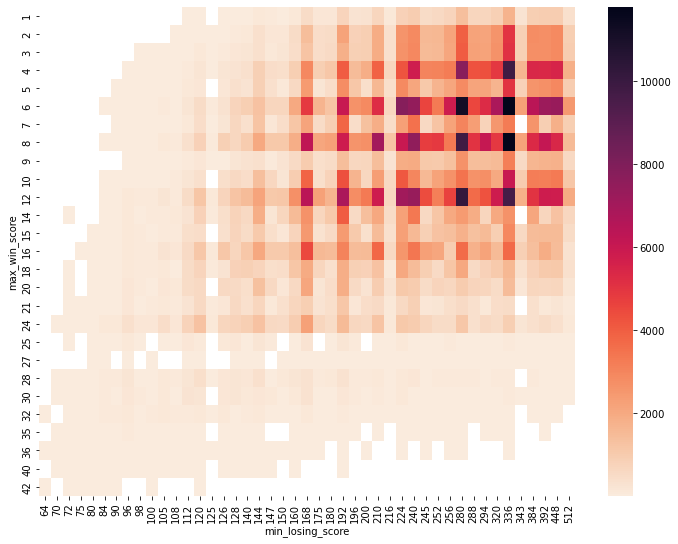

In [27]:
heatmap_data = pd.pivot_table(df4, values = 'score_count', index = 'max_win_score', columns = 'min_losing_score')
plt.figure(figsize=(12,9))
sns.heatmap(heatmap_data, cmap = "rocket_r")

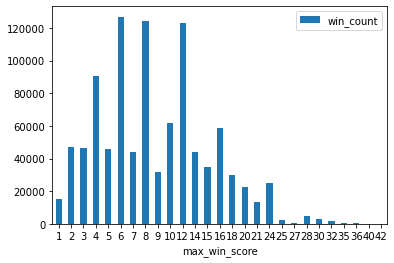

In [29]:
ax = df2.plot.bar(x='max_win_score', y='win_count', rot=0)